## imports and data loading

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections

In [2]:
train_df = pd.read_csv("train.csv",engine='python')

In [35]:
train_df.timestamp = pd.to_datetime(train_df.timestamp)

In [4]:
train_df.head(30)

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0
5,5,0,2016-01-01 00:00:00,0.0
6,6,0,2016-01-01 00:00:00,0.0
7,7,0,2016-01-01 00:00:00,0.0
8,8,0,2016-01-01 00:00:00,0.0
9,9,0,2016-01-01 00:00:00,0.0


In [105]:
train_df.shape[0]

20216100

## Building id

In [192]:
len(np.unique(train_df.building_id))

1449

In [101]:
building_id = train_df.building_id.value_counts().index
samples = train_df.building_id.value_counts().values

<BarContainer object of 1449 artists>

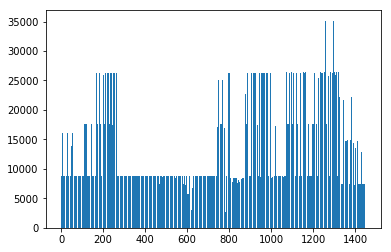

In [103]:
%matplotlib inline
plt.bar(x=building_id,height=samples)

In [ ]:
# 1449 building with different number of measures from 400 to 35000

## meter column

In [16]:
train_df.meter.value_counts()

0    12060910
1     4182440
2     2708713
3     1264037
Name: meter, dtype: int64

In [238]:
## most of values in the meter column are of type 0

In [240]:
meter_type_dict = {0: "electricity", 1: "chilledwater", 2: "steam", 3: "hotwater"}

In [21]:
train_df.groupby('meter').building_id.nunique()

meter
0    1413
1     498
2     324
3     145
Name: building_id, dtype: int64

In [ ]:
## 145 different buildings for the hotwater meter, 324 for steam etc.

In [193]:
building_meter_tuples = train_df.loc[:,['building_id','meter']]

In [196]:
building_meter_tuples.drop_duplicates(inplace=True)

In [214]:
building_meter_tuples.shape[0]

2380

In [215]:
building_meter_dict = collections.defaultdict(list)

In [217]:
for index,row in building_meter_tuples.iterrows():
    building_meter_dict[row.values[0]].append(row.values[1])

In [219]:
more_than_one_count = 0
for key,value in building_meter_dict.items():
    if len(value)>1:
        more_than_one_count+=1
more_than_one_count

574

In [ ]:
## 574 building with more than 1 meter readings

## timestamp column

In [49]:
groupby_building = train_df.groupby('building_id')

In [73]:
time_difference_per_building = groupby_building.timestamp.max() - groupby_building.timestamp.min()

In [79]:
unique_times,unique_counts = np.unique(time_difference_per_building.values,return_counts=True)

In [80]:
unique_times = pd.to_timedelta(unique_times)

In [82]:
for time,count in zip(unique_times,unique_counts):
    print(f"{time}  :  appears {count} times")

19 days 22:00:00  :  appears 1 times
96 days 23:00:00  :  appears 1 times
110 days 17:00:00  :  appears 1 times
120 days 14:00:00  :  appears 1 times
124 days 08:00:00  :  appears 1 times
127 days 14:00:00  :  appears 1 times
144 days 08:00:00  :  appears 1 times
144 days 10:00:00  :  appears 1 times
172 days 08:00:00  :  appears 1 times
194 days 17:00:00  :  appears 1 times
217 days 23:00:00  :  appears 1 times
226 days 08:00:00  :  appears 1 times
241 days 08:00:00  :  appears 1 times
254 days 23:00:00  :  appears 1 times
270 days 00:00:00  :  appears 1 times
276 days 10:00:00  :  appears 1 times
289 days 23:00:00  :  appears 1 times
299 days 08:00:00  :  appears 1 times
307 days 03:00:00  :  appears 1 times
313 days 13:00:00  :  appears 3 times
331 days 22:00:00  :  appears 1 times
349 days 00:00:00  :  appears 1 times
352 days 15:00:00  :  appears 1 times
358 days 23:00:00  :  appears 1 times
360 days 03:00:00  :  appears 1 times
360 days 22:00:00  :  appears 1 times
364 days 23:00

In [ ]:
## most buildings have 365 days of readings

## meter reading (target column)

In [226]:
# range per meter type
train_df.groupby('meter')['meter_reading'].describe()

,count,mean,std,min,25%,50%,75%,max
meter,,,,,,,,
0,12060910.0,170.825636,380.834307,0.0,19.5000,62.8319,170.075,79769.0
1,4182440.0,633.363924,7988.213146,0.0,11.3288,120.4870,464.314,880374.0
2,2708713.0,13882.187689,418313.503638,0.0,45.7500,257.8120,1035.320,21904700.0
3,1264037.0,385.866781,2508.172498,0.0,0.0000,39.6237,241.285,160187.0


0
1
2
3


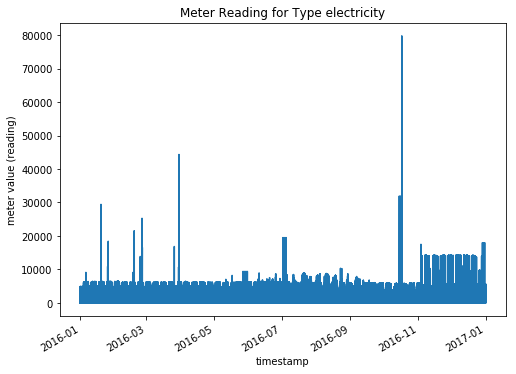

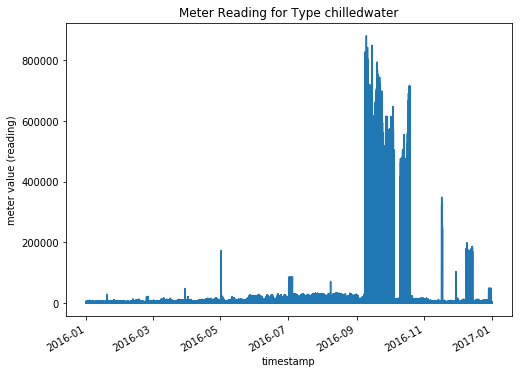

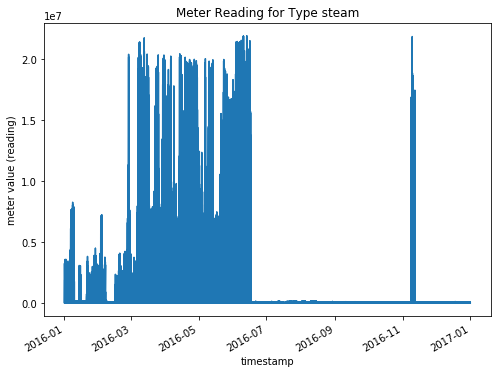

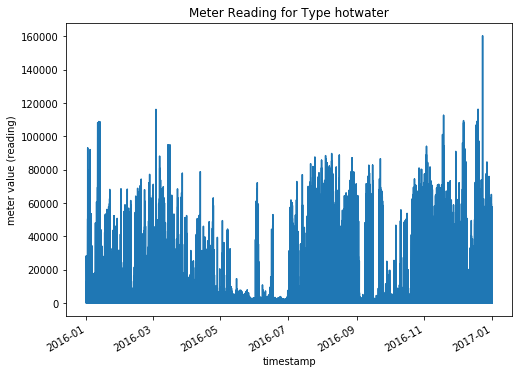

In [241]:
for label, df in train_df.groupby('meter'):
    print(label)
    fig, ax = plt.subplots(figsize=(8,6))
    df.set_index("timestamp",inplace=True)
    df.meter_reading.plot(kind="line", ax=ax, title=f"Meter Reading for Type {meter_type_dict[label]}")
    plt.ylabel("meter value (reading)")
plt.show()

## plot of a single index

In [107]:
def plot_by_building_id(building_id):
    cur_building_data = train_df[train_df.building_id == building_id]
    cur_building_data.plot(x ='timestamp', y='meter_reading', rot=90) 
    plt.xlabel("timestamp")
    plt.ylabel("meter reading")

In [136]:
cur_building_data = train_df[train_df.building_id == 20]

In [137]:
pd.infer_freq(cur_building_data.timestamp)

'H'

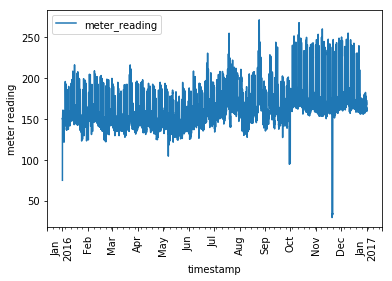

In [138]:
%matplotlib inline
building_id = 125
plot_by_building_id(building_id)

In [29]:
## it's better to overestimate these values because of the metric

## baseline

In [243]:
test_df = pd.read_csv("data/test.csv")

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


In [ ]:
## baseline - predict the average per meter in the train as the meter for the test

In [252]:
meter_to_avg_dict = train_df.groupby('meter').meter_reading.mean().T.to_dict()

In [259]:
test_df['meter_reading'] = test_df.meter.map(meter_to_avg_dict)

In [266]:
submission_df = test_df.loc[:,['row_id','meter_reading']]

In [268]:
submission_df.set_index('row_id')

,meter_reading
row_id,
0,170.825636
1,170.825636
2,170.825636
3,170.825636
4,170.825636
5,170.825636
6,170.825636
7,170.825636
8,633.363924


In [270]:
submission_df['meter_reading'] = submission_df['meter_reading'].round(4)

In [273]:
submission_df.to_csv('submission.csv',index=False)

# check stuff on test...

<BarContainer object of 1449 artists>

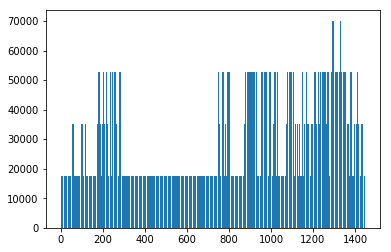

In [274]:
building_id = test_df.building_id.value_counts().index
samples = test_df.building_id.value_counts().values
%matplotlib inline
plt.bar(x=building_id,height=samples)

In [ ]:
# same number of building

In [276]:
test_df.meter.value_counts()/train_df.meter.value_counts()

0    2.052562
1    2.086093
2    2.095637
3    2.009751
Name: meter, dtype: float64

In [ ]:
## approximately same ratio of samples per metric